In [2]:
# Cell 1: Importations et chargement des données
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Configuration de l'affichage
plt.style.use("default")
sns.set_palette("husl")

# Charger les données
df = pd.read_csv(
    "../dataset/all_tickets_processed_improved_v3.csv"
)  # Remplacez par votre chemin de fichier

In [3]:
# Cell 2: Aperçu des données
print("=== APERÇU DU DATASET ===")
print(f"Dimensions: {df.shape}")
print(f"Colonnes: {df.columns.tolist()}")
print("\nPremières lignes:")
display(df.head())

print("\n=== INFORMATIONS GÉNÉRALES ===")
print(df.info())
print(f"\nValeurs manquantes:")
print(df.isnull().sum())

=== APERÇU DU DATASET ===
Dimensions: (47837, 2)
Colonnes: ['Document', 'Topic_group']

Premières lignes:


,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous



=== INFORMATIONS GÉNÉRALES ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document     47837 non-null  object
 1   Topic_group  47837 non-null  object
dtypes: object(2)
memory usage: 747.6+ KB
None

Valeurs manquantes:
Document       0
Topic_group    0
dtype: int64


/tmp/ipykernel_149527/3357197693.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='viridis')


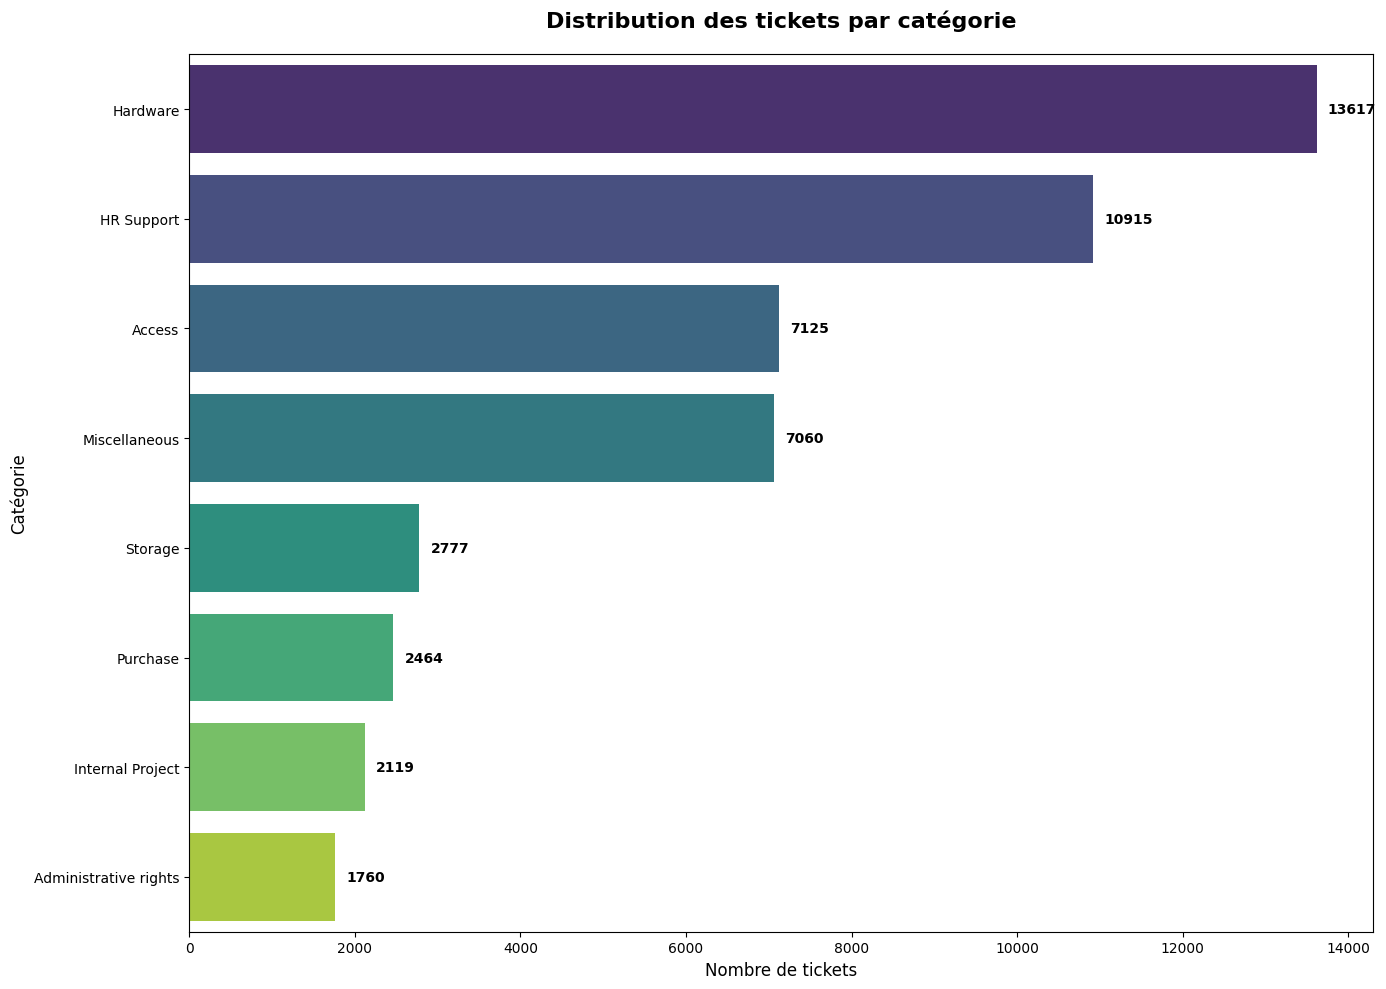

In [4]:
# Cell 3: Graphique à barres - Nombre de tickets par catégorie
plt.figure(figsize=(14, 10))
topic_counts = df["Topic_group"].value_counts()

ax = sns.barplot(x=topic_counts.values, y=topic_counts.index, palette="viridis")
plt.title(
    "Distribution des tickets par catégorie", fontsize=16, fontweight="bold", pad=20
)
plt.xlabel("Nombre de tickets", fontsize=12)
plt.ylabel("Catégorie", fontsize=12)

# Ajouter les valeurs sur les barres
for i, v in enumerate(topic_counts.values):
    ax.text(
        v + max(topic_counts.values) * 0.01,
        i,
        str(v),
        va="center",
        fontsize=10,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

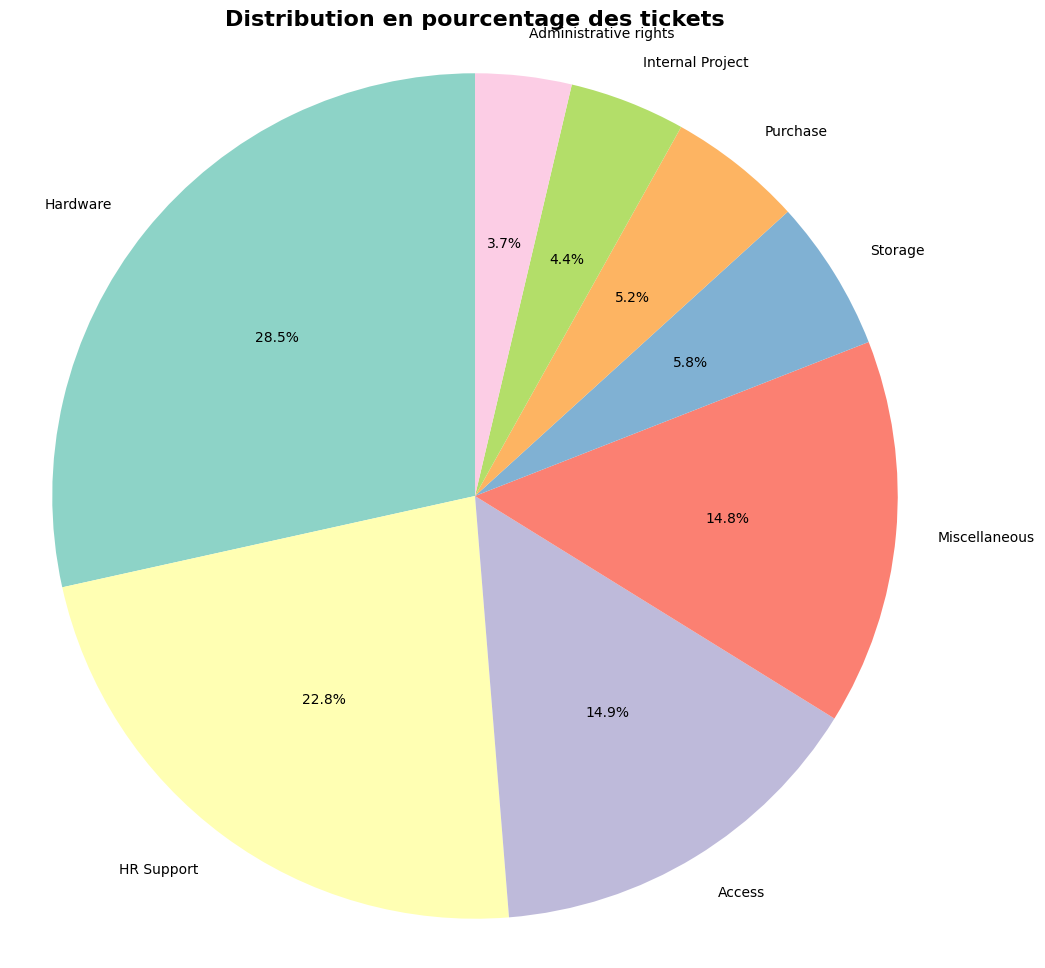

In [5]:
# Cell 4: Graphique camembert
plt.figure(figsize=(12, 12))
colors = plt.cm.Set3(range(len(topic_counts)))
plt.pie(
    topic_counts.values,
    labels=topic_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    textprops={"fontsize": 10},
)
plt.title("Distribution en pourcentage des tickets", fontsize=16, fontweight="bold")
plt.axis("equal")
plt.show()

In [6]:
# Cell 5: Statistiques descriptives
print("=== STATISTIQUES DÉTAILLÉES ===")
print(f"Nombre total de tickets: {len(df):,}")
print(f"Nombre de catégories: {df['Topic_group'].nunique()}")
print(
    f"Catégorie la plus fréquente: {topic_counts.index[0]} ({topic_counts.values[0]:,} tickets - {topic_counts.values[0]/len(df)*100:.1f}%)"
)
print(
    f"Catégorie la moins fréquente: {topic_counts.index[-1]} ({topic_counts.values[-1]:,} tickets - {topic_counts.values[-1]/len(df)*100:.1f}%)"
)

print("\n=== RÉPARTITION COMPLÈTE ===")
for i, (topic, count) in enumerate(topic_counts.items()):
    print(f"{i+1:2d}. {topic:<25} {count:>5,} tickets ({count/len(df)*100:>5.1f}%)")

=== STATISTIQUES DÉTAILLÉES ===
Nombre total de tickets: 47,837
Nombre de catégories: 8
Catégorie la plus fréquente: Hardware (13,617 tickets - 28.5%)
Catégorie la moins fréquente: Administrative rights (1,760 tickets - 3.7%)

=== RÉPARTITION COMPLÈTE ===
 1. Hardware                  13,617 tickets ( 28.5%)
 2. HR Support                10,915 tickets ( 22.8%)
 3. Access                    7,125 tickets ( 14.9%)
 4. Miscellaneous             7,060 tickets ( 14.8%)
 5. Storage                   2,777 tickets (  5.8%)
 6. Purchase                  2,464 tickets (  5.2%)
 7. Internal Project          2,119 tickets (  4.4%)
 8. Administrative rights     1,760 tickets (  3.7%)


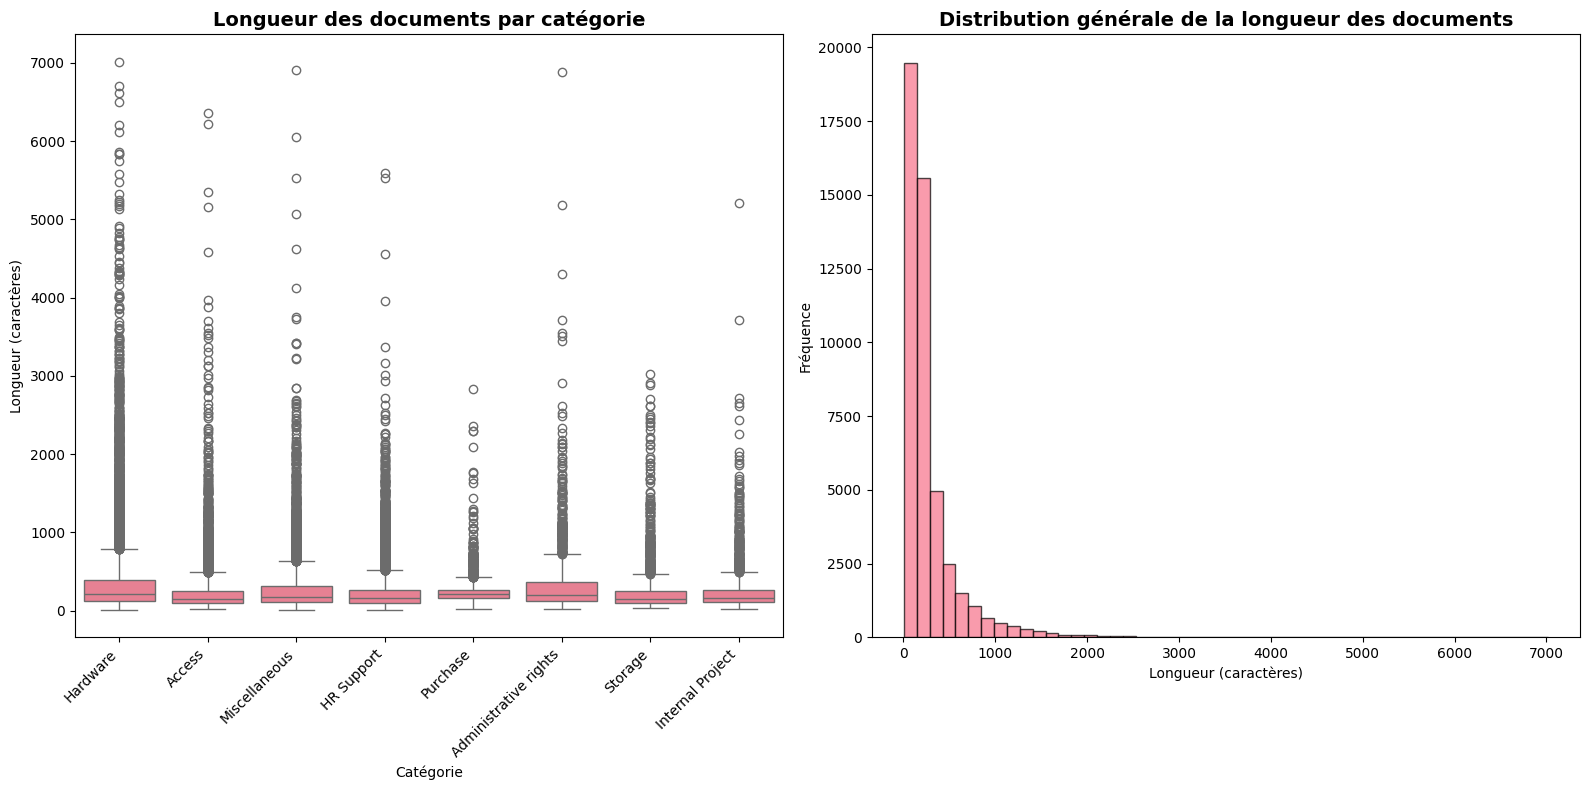


=== STATISTIQUES LONGUEUR DES DOCUMENTS ===
Longueur moyenne: 292 caractères
Longueur médiane: 175 caractères
Longueur maximale: 7015 caractères
Longueur minimale: 7 caractères


In [7]:
# Cell 6: Analyse de la longueur des documents
df["doc_length"] = df["Document"].str.len()

plt.figure(figsize=(16, 8))

# Boxplot par catégorie
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="Topic_group", y="doc_length")
plt.title("Longueur des documents par catégorie", fontsize=14, fontweight="bold")
plt.xlabel("Catégorie", fontsize=10)
plt.ylabel("Longueur (caractères)", fontsize=10)
plt.xticks(rotation=45, ha="right")

# Histogramme général
plt.subplot(1, 2, 2)
plt.hist(df["doc_length"], bins=50, edgecolor="black", alpha=0.7)
plt.title(
    "Distribution générale de la longueur des documents", fontsize=14, fontweight="bold"
)
plt.xlabel("Longueur (caractères)", fontsize=10)
plt.ylabel("Fréquence", fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n=== STATISTIQUES LONGUEUR DES DOCUMENTS ===")
print(f"Longueur moyenne: {df['doc_length'].mean():.0f} caractères")
print(f"Longueur médiane: {df['doc_length'].median():.0f} caractères")
print(f"Longueur maximale: {df['doc_length'].max():.0f} caractères")
print(f"Longueur minimale: {df['doc_length'].min():.0f} caractères")

/tmp/ipykernel_149527/2749334231.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


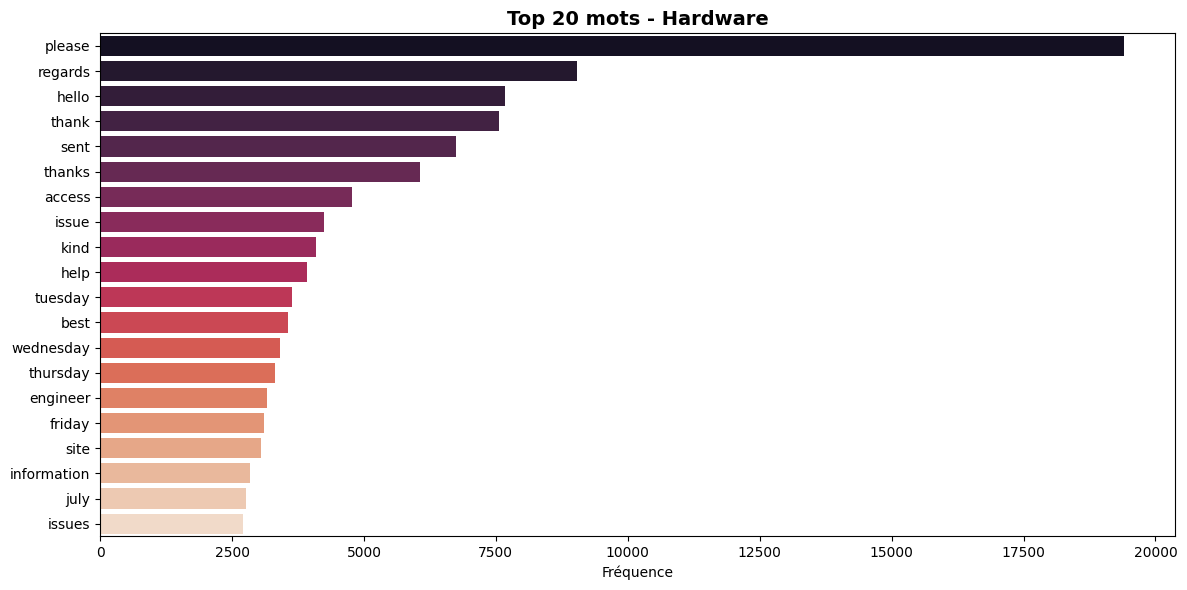

/tmp/ipykernel_149527/2749334231.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


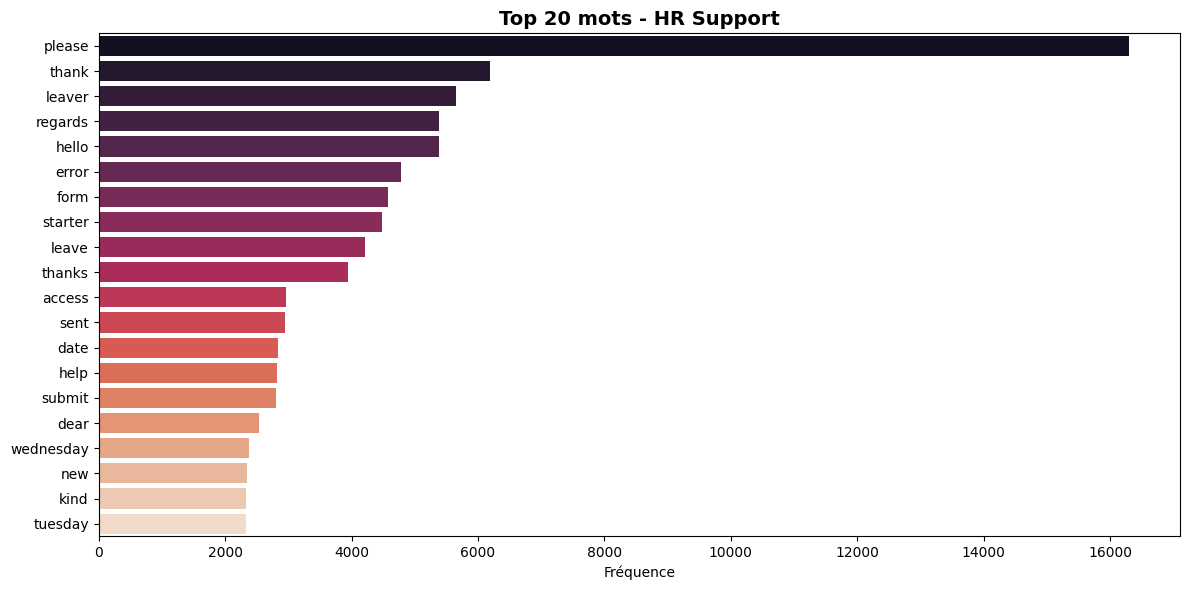

/tmp/ipykernel_149527/2749334231.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


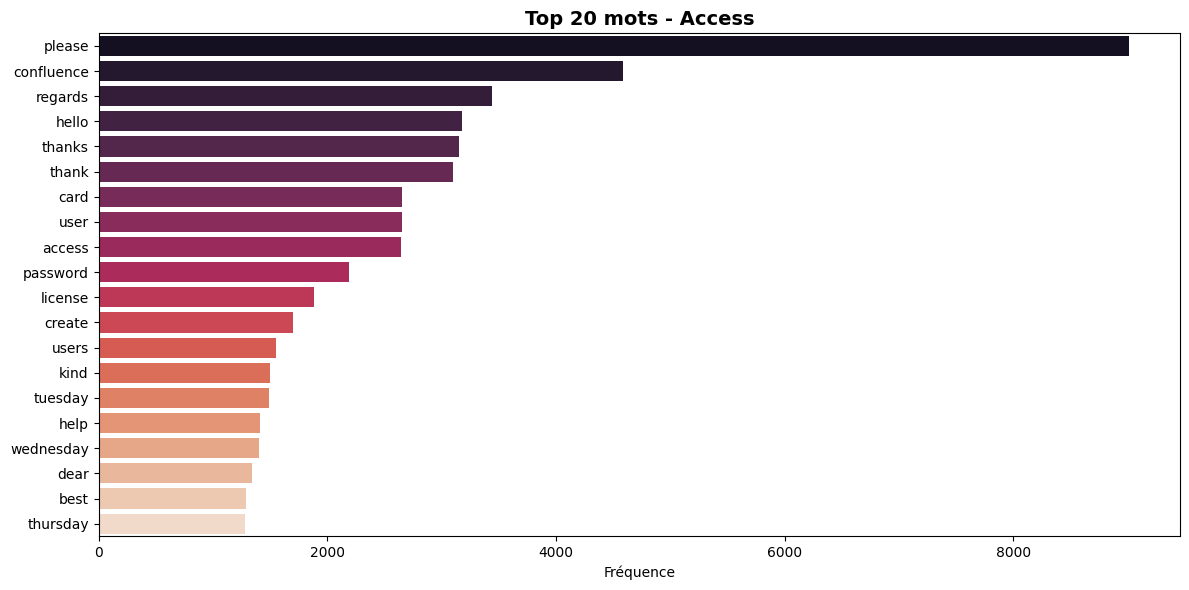

In [8]:
# Cell 7: Top mots par catégorie (optionnel)
# nltk.download('stopwords')  # Décommentez si nécessaire


def plot_top_words_category(category_name, top_n=20):
    """Affiche les mots les plus fréquents pour une catégorie spécifique"""
    category_docs = df[df["Topic_group"] == category_name]["Document"]
    all_text = " ".join(category_docs.astype(str))

    # Tokenization et nettoyage
    words = all_text.split()
    stop_words = set(stopwords.words(["english", "french"]))
    words = [
        word.lower().strip(string.punctuation)
        for word in words
        if word.lower() not in stop_words and len(word) > 2
    ]

    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)

    plt.figure(figsize=(12, 6))
    words, counts = zip(*top_words)
    sns.barplot(x=list(counts), y=list(words), palette="rocket")
    plt.title(f"Top {top_n} mots - {category_name}", fontsize=14, fontweight="bold")
    plt.xlabel("Fréquence")
    plt.tight_layout()
    plt.show()


# Exemple pour les 3 premières catégories
for category in df["Topic_group"].value_counts().head(3).index:
    plot_top_words_category(category)

In [9]:
# Cell 8: Résumé final
print("🎯 **RÉSUMÉ POUR LA MODÉLISATION**")
print("=" * 50)
print(f"📊 Taille dataset: {len(df):,} tickets")
print(f"🏷️  Nombre de classes: {df['Topic_group'].nunique()}")
print(
    f"⚖️  Balance des classes: { 'Équilibré' if topic_counts.std()/topic_counts.mean() < 0.5 else 'Déséquilibré' }"
)
print(f"📝 Longueur moyenne: {df['doc_length'].mean():.0f} caractères")
print(f"🔤 Langues détectées: À analyser avec des modèles multilingues")

print("\n📈 **RECOMMANDATIONS:**")
if topic_counts.std() / topic_counts.mean() > 0.5:
    print("• Considérer des techniques pour gérer le déséquilibre des classes")
print("• Preprocessing: Nettoyage de texte, gestion des stopwords")
print("• Modèles: TF-IDF + SVM pour rapidité, Transformer pour précision")
print("• Validation: Stratified K-Fold pour maintenir la distribution des classes")

🎯 **RÉSUMÉ POUR LA MODÉLISATION**
📊 Taille dataset: 47,837 tickets
🏷️  Nombre de classes: 8
⚖️  Balance des classes: Déséquilibré
📝 Longueur moyenne: 292 caractères
🔤 Langues détectées: À analyser avec des modèles multilingues

📈 **RECOMMANDATIONS:**
• Considérer des techniques pour gérer le déséquilibre des classes
• Preprocessing: Nettoyage de texte, gestion des stopwords
• Modèles: TF-IDF + SVM pour rapidité, Transformer pour précision
• Validation: Stratified K-Fold pour maintenir la distribution des classes


In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
import nltk
from nltk.stem import WordNetLemmatizer
import re
import os
from dotenv import load_dotenv

In [11]:
# 📥 Download NLTK resources
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/medhedimaaroufi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/medhedimaaroufi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/medhedimaaroufi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# ⚙️ Set MLflow Tracking URI
load_dotenv()
DATABRICKS_HOST = os.getenv("url")
DATABRICKS_TOKEN = os.getenv("access_token")
EXPERIMENT_NAME = os.getenv("EXPERIMENT_NAME")
mlflow.set_tracking_uri("databricks")
os.environ["DATABRICKS_HOST"] = DATABRICKS_HOST
os.environ["DATABRICKS_TOKEN"] = DATABRICKS_TOKEN
mlflow.set_experiment(EXPERIMENT_NAME)

MODEL_VERSION = 1.5

In [15]:
# 📂 Load and preprocess dataset
def load_data(dataset_path="../dataset/all_tickets_processed_improved_v3.csv"):
    if "Document" not in df.columns or "Topic_group" not in df.columns:
        raise ValueError("Dataset must contain 'Document' and 'Topic_group' columns")

    # Stopwords + Lemmatizer
    stop_words = set(nltk.corpus.stopwords.words("english")) | {
        "please",
        "ticket",
        "help",
    }
    lemmatizer = WordNetLemmatizer()

    def preprocess_text(text):
        text = re.sub(r"[^\w\s]", "", text.lower())
        tokens = re.findall(r"\w+", text)
        tokens = [
            lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
        ]
        return " ".join(tokens)

    df["Document"] = df["Document"].apply(preprocess_text)
    return df["Document"].values, df["Topic_group"].values


X, y = load_data()
print(f"Dataset loaded. {len(X)} samples.")

Dataset loaded. 47837 samples.


/tmp/ipykernel_149527/918932789.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


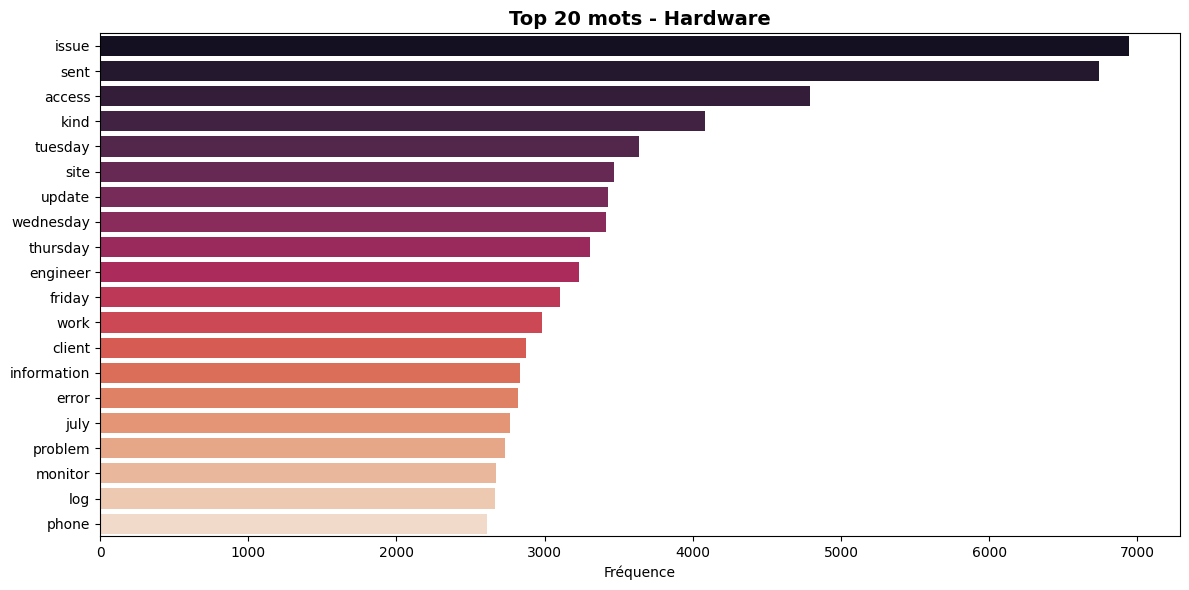

/tmp/ipykernel_149527/918932789.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


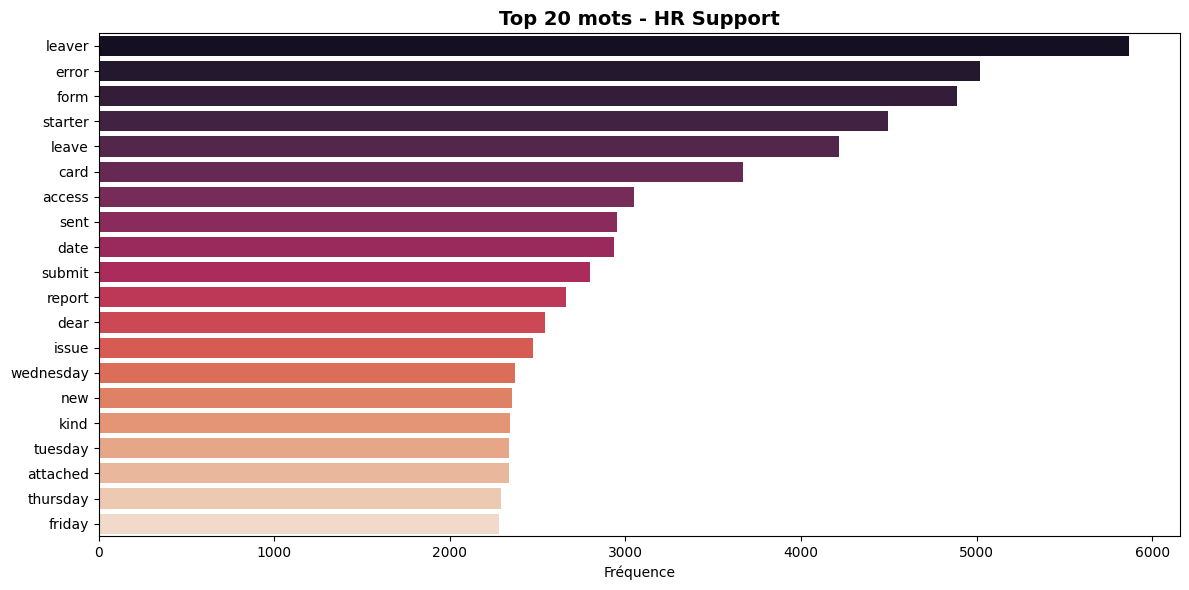

/tmp/ipykernel_149527/918932789.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


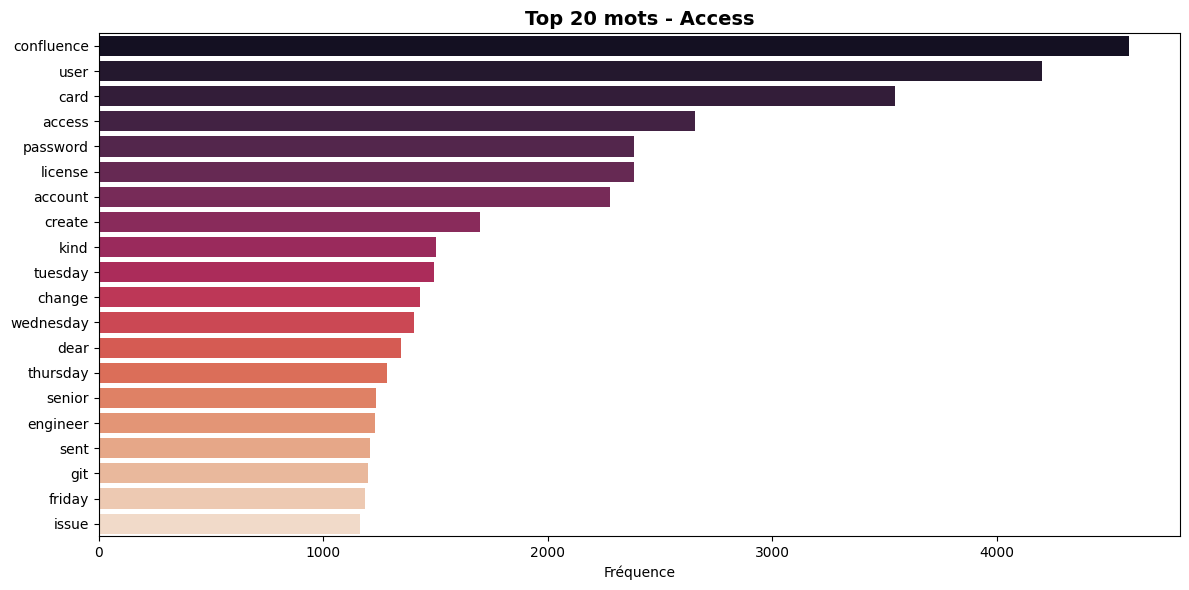

/tmp/ipykernel_149527/918932789.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


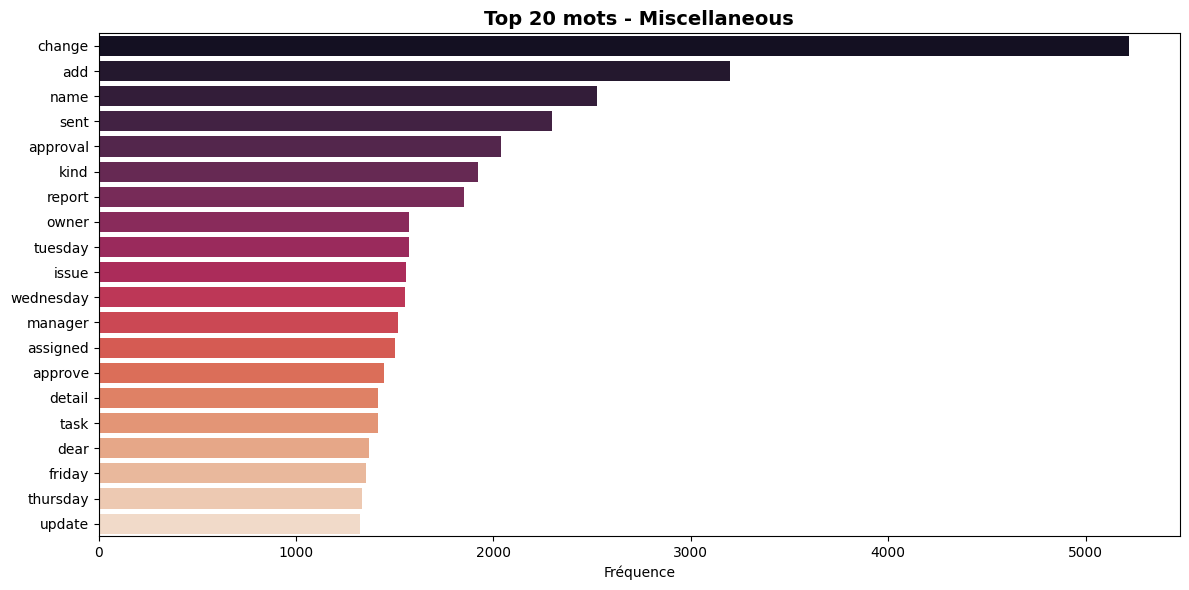

/tmp/ipykernel_149527/918932789.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


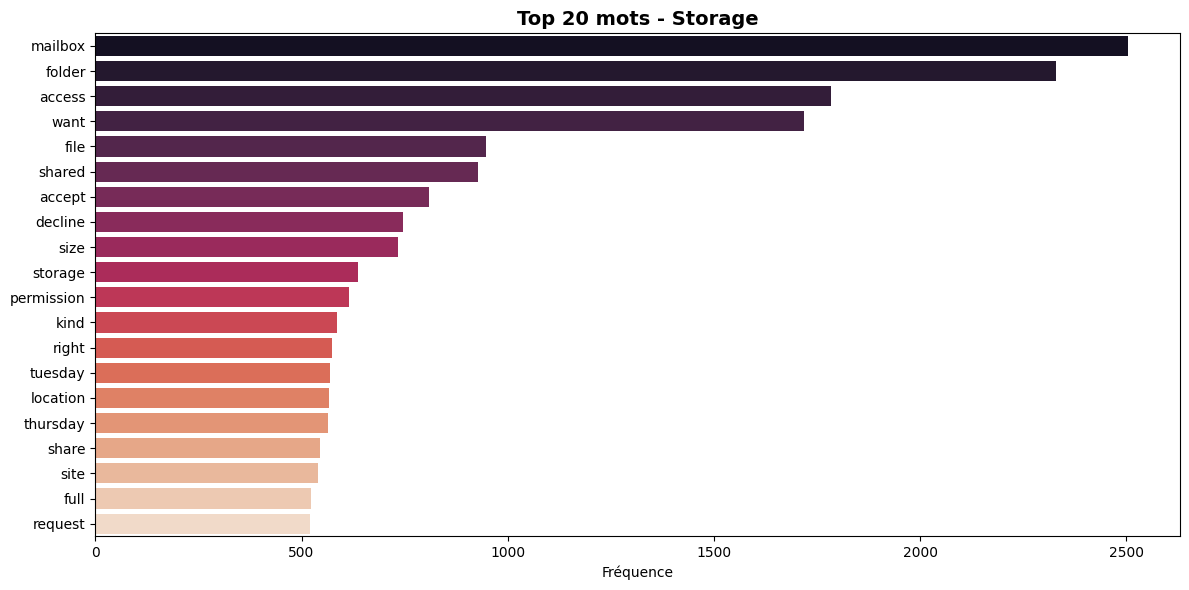

/tmp/ipykernel_149527/918932789.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


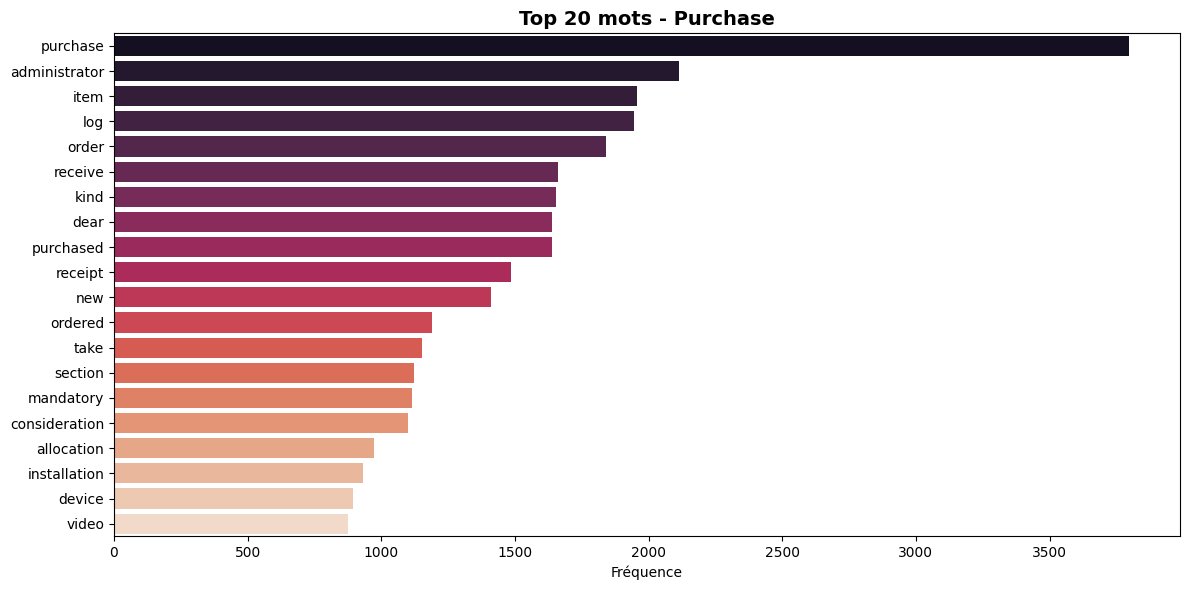

/tmp/ipykernel_149527/918932789.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


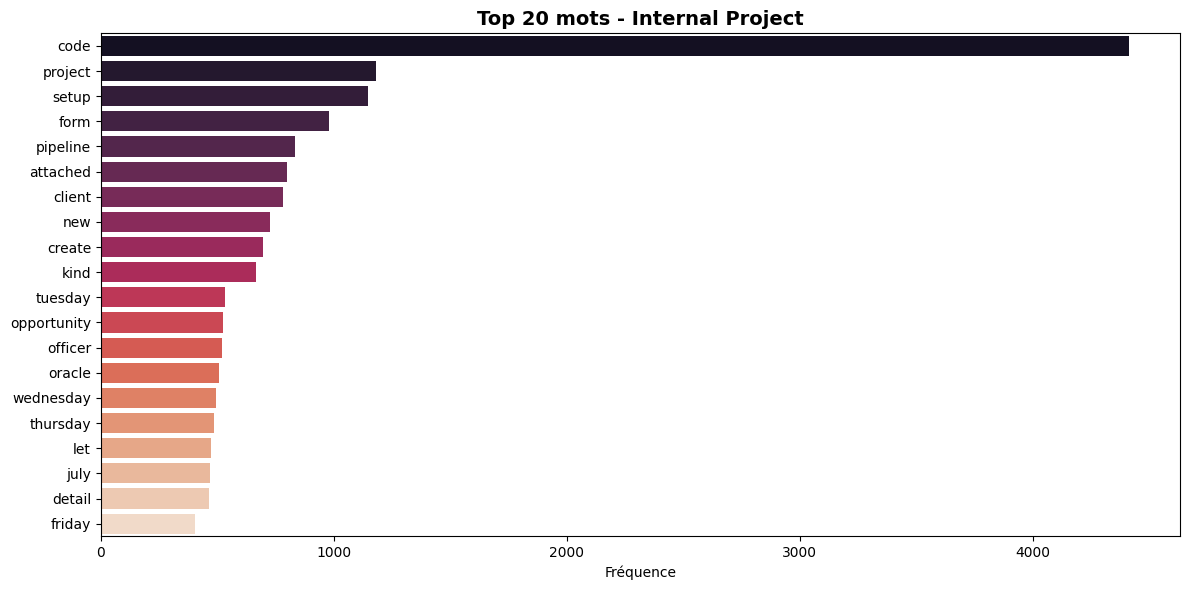

/tmp/ipykernel_149527/918932789.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


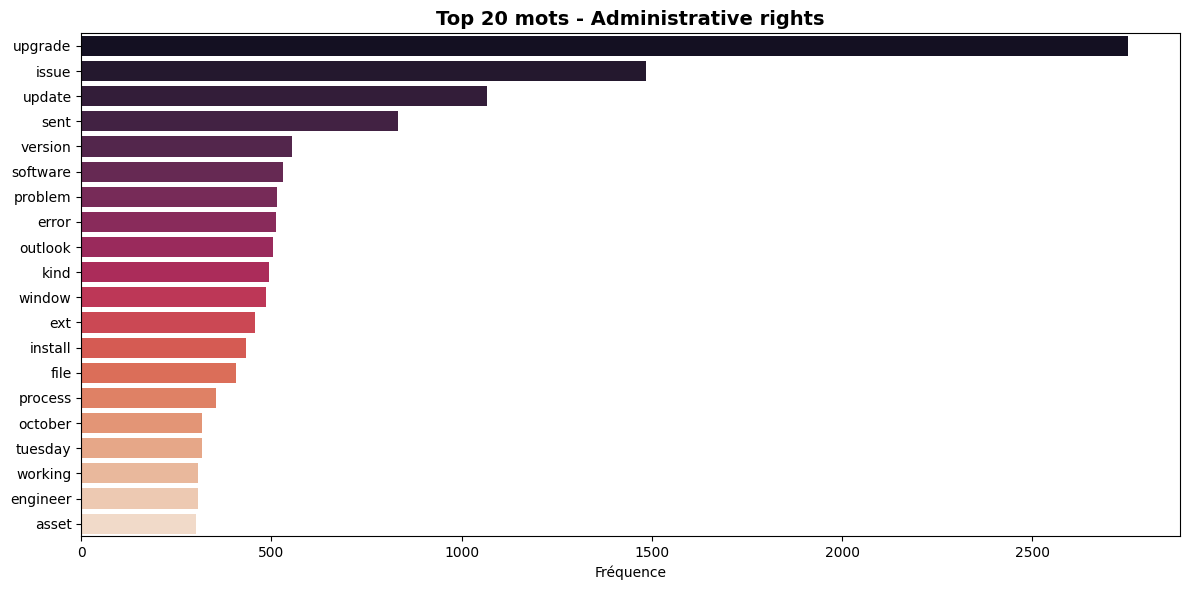

In [16]:
# Cell 7: Top mots par catégorie (optionnel)
# nltk.download('stopwords')  # Décommentez si nécessaire


def plot_top_words_category(category_name, top_n=20):
    """Affiche les mots les plus fréquents pour une catégorie spécifique"""
    category_docs = df[df["Topic_group"] == category_name]["Document"]
    all_text = " ".join(category_docs.astype(str))

    # Tokenization et nettoyage
    words = all_text.split()
    stop_words = set(stopwords.words(["english", "french"])).union(
        {"thank", "hello", "thanks", "regards", "regard", "best"}
    )
    words = [
        word.lower().strip(string.punctuation)
        for word in words
        if word.lower() not in stop_words and len(word) > 2
    ]

    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)

    plt.figure(figsize=(12, 6))
    words, counts = zip(*top_words)
    sns.barplot(x=list(counts), y=list(words), palette="rocket")
    plt.title(f"Top {top_n} mots - {category_name}", fontsize=14, fontweight="bold")
    plt.xlabel("Fréquence")
    plt.tight_layout()
    plt.show()


# Exemple pour les 3 premières catégories
for category in df["Topic_group"].value_counts().index:
    plot_top_words_category(category)

In [19]:
# 🏋️ Train TF-IDF + SVM model
def train_tfidf_svm(X, y):
    # Vectorizer
    vectorizer = TfidfVectorizer(
        ngram_range=(1, 3), max_features=10000, min_df=5, sublinear_tf=True
    )
    X_tfidf = vectorizer.fit_transform(X)

    # Grid Search for best C
    param_grid = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l2"]}
    svm = LinearSVC(class_weight="balanced", max_iter=2000)
    grid_search = GridSearchCV(svm, param_grid, cv=3, scoring="f1_weighted")
    grid_search.fit(X_tfidf, y)

    # Calibrate for probabilities
    best_svm = grid_search.best_estimator_
    calibrated_svm = CalibratedClassifierCV(best_svm, cv=3)
    calibrated_svm.fit(X_tfidf, y)

    # Cross-validation accuracy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(best_svm, X_tfidf, y, cv=cv, scoring="accuracy")

    # Predictions
    y_pred = calibrated_svm.predict(X_tfidf)
    probabilities = calibrated_svm.predict_proba(X_tfidf)

    return calibrated_svm, vectorizer, y, y_pred, probabilities, cv_scores.mean()


model, vectorizer, y_true, y_pred, probs, cv_accuracy = train_tfidf_svm(X, y)

In [20]:
from sklearn.pipeline import Pipeline

# Create a pipeline
pipeline = Pipeline([("tfidf", vectorizer), ("svm", model)])

# 📊 Evaluate model
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ CV Accuracy: {cv_accuracy:.4f}")

✅ Accuracy: 0.8866
✅ F1 Score: 0.8867
✅ CV Accuracy: 0.8525


In [21]:
# 📈 Log with MLflow
MODEL_VERSION = MODEL_VERSION + 0.1
with mlflow.start_run(run_name=str("Train-v" + str(MODEL_VERSION)[:3])):
    mlflow.log_param("model", "TF-IDF + SVM")
    mlflow.log_param("ngram_range", "(1, 3)")
    mlflow.log_param("max_features", 10000)
    mlflow.log_param("min_df", 5)
    mlflow.log_param("sublinear_tf", True)
    mlflow.log_param("best_C", model.calibrated_classifiers_[0].estimator.C)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("cv_accuracy", cv_accuracy)

    # Example input
    input_example = np.array(["new hardware issue"])
    X_example_tfidf = vectorizer.transform(input_example)
    signature = infer_signature(X_example_tfidf, model.predict(X_example_tfidf))

    mlflow.sklearn.log_model(
        pipeline,
        artifact_path="tfidf_svm_model",
        signature=signature,
        input_example=input_example,
        registered_model_name="workspace.default.tfidf_svm_classifier",
    )

2025/10/04 02:45:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/04 02:46:01 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": [
    "new hardware issue"
  ]
}. Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_example_to_serving_input` function.
Got error: Invalid input. could not convert string to float: 'new hardware issue'
2025/10/04 02:46:01 INFO mlflow.models.model: Found the following environment variables used during model inference: [DATABRICKS_HOST, DATABRICKS_TOKEN]. Please check if you need to set them when deploying the model. To disable this message, set environment variable `MLF

🏃 View run Train-v1.6 at: https://dbc-20a6a535-5b35.cloud.databricks.com/ml/experiments/2204783764228857/runs/f17a4b5377e64eb98b51014a8dadd3bb
🧪 View experiment at: https://dbc-20a6a535-5b35.cloud.databricks.com/ml/experiments/2204783764228857
